In [196]:
import time
import math
import joblib
import glob
import warnings
import pandas as pd
import numpy as np
import itertools
from collections import deque
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")

In [2]:
from cool import transform

data = pd.DataFrame()
files = [file for file in glob.glob("../data/tickerdata/*.bin")]
for file_name in files:
    df = joblib.load(file_name)
    data = pd.concat([data, df], axis=0)
result_df = transform(data)
result_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YangWang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:15<00:00,  2.71it/s]


,ticker,date,Top 1 News,Top 2 News,Top 3 News,Top 4 News,Top 5 News,Top 6 News,Top 7 News,Top 8 News,...,Top 16 News,Top 17 News,Top 18 News,Top 19 News,Top 20 News,Top 21 News,Top 22 News,Top 23 News,Top 24 News,Top 25 News
0,T,2020-02-25,nannannannannanTOKYO (Reuters) - Mitsubishi UF...,"The decision by Japan’s biggest bank, followin...",Nissan Motor Co Ltd (7201.T) limited its launc...,Rather than trying to contain the disease outr...,"The government plan, approved a cabinet meetin...","“We wanted to have this conference in person, ...","Japan has 160 domestic infections, apart from ...","On Tuesday, broadcaster NHK reported a fourth ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T,2020-06-18,nannannannannan(Corrects to adds dropped sourc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T,2020-02-12,SoftBank Group jumped 11.9% to become the coun...,Nissan Motor Co lost 1.7% after the automaker ...,"In contrast to the upbeat mood on Wall Street,...","The deal would allow SoftBank Group, which rep...",The Nikkei share average closed 0.74% higher a...,The tech conglomerate’s stock has risen 20% ye...,"However, more than two-thirds of the 33 sector...","Overnight, the S&P 500 and the Nasdaq inched t...",...,"Elsewhere, chip-related companies attracted bu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,2019-12-10,nannannannannanNEW YORK (Reuters) - T-Mobile U...,"Timotheus Höttges, who is chairman of T-Mobile...",The states have argued that Dish is not a viab...,"On Tuesday, Glenn Pomerantz, an attorney repre...","A group of state attorneys general, led by New...",His testimony came on the second day of a tria...,Attorneys for the states presented evidence on...,T-Mobile and Sprint have already received appr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,2019-10-29,"Though Legere provided few details, he said in...","It faces a state attorneys general lawsuit, le...",The third-largest U.S. wireless carrier by sub...,"T-Mobile Chief Executive John Legere, speaking...","The carrier added 754,000 phone subscribers wh...","Analysts had expected 742,600 new postpaid pho...",T-Mobile customer growth in quarters: here Leg...,"Both Verizon and AT&T, which are larger than T...",...,nannannannannan(Reuters) - T-Mobile US Inc (TM...,Investors pay close attention to postpaid cust...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sparsity Ratio: 0.6955244964027976


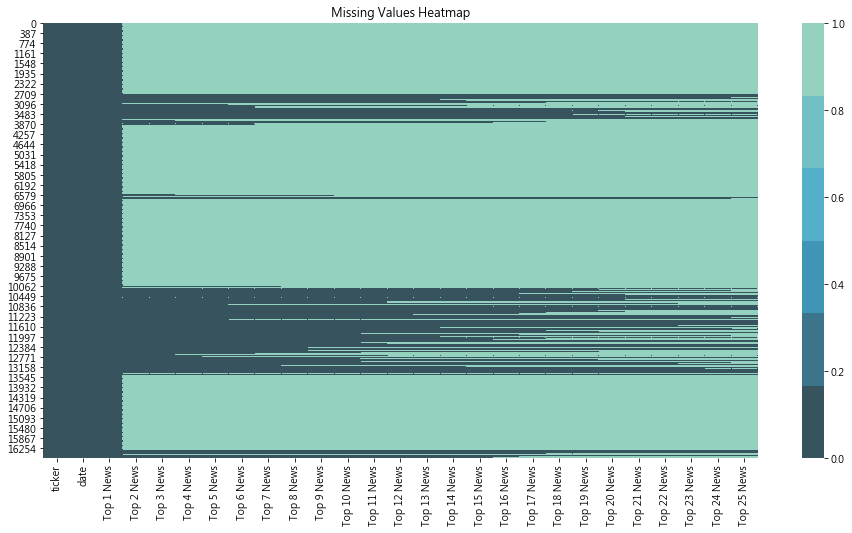

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_nan(df):
    sparse = df.isna().sum().sum()
    total = df.shape[0] * df.shape[1]
    ratio = sparse / total
    print("Sparsity Ratio: {:.4f}".format(ratio))
    plt.figure(figsize=(16, 8))
    sns.heatmap(df.isnull(), cbar=True, cmap=sns.color_palette("GnBu_d"))
    plt.title("Missing Values Heatmap")
    plt.show()
    
check_nan(result_df)

In [4]:
import yfinance as yf

def load_stock(ticker_name, start_date="2012-01-01"):
    ticker = yf.Ticker(ticker_name)
    hist = ticker.history(period="max", start=start_date)
    hist.index = hist.index.set_names(['date'])
    hist = hist.reset_index(drop=False, inplace=False)
    hist["date"] = pd.to_datetime(hist["date"], utc=True)
    hist['date'] = hist['date'].apply(lambda x: x.date())
    hist.sort_values(by='date', inplace=True)
    hist.reset_index(drop=True, inplace=True)
    hist["ticker"] = ticker_name
    hist["label"] = hist["Close"].diff(periods=1)
    hist.dropna(inplace=True)
    hist["label"] = hist["label"].map(lambda x: 1 if float(x) >= 0 else 0)
    return hist

def load_news(news_path):
    news = joblib.load(news_path)
    news.reset_index(drop=True, inplace=True)
    return news

In [23]:
joblib.dump(result_df, "../data/sp500_top100_content_base_v2.bin")

['../data/sp500_top100_content_base_v2.bin']

In [24]:
result_df

,ticker,date,Top 1 News,Top 2 News,Top 3 News,Top 4 News,Top 5 News,Top 6 News,Top 7 News,Top 8 News,...,Top 16 News,Top 17 News,Top 18 News,Top 19 News,Top 20 News,Top 21 News,Top 22 News,Top 23 News,Top 24 News,Top 25 News
0,T,2020-02-25,nannannannannanTOKYO (Reuters) - Mitsubishi UF...,"The decision by Japan’s biggest bank, followin...",Nissan Motor Co Ltd (7201.T) limited its launc...,Rather than trying to contain the disease outr...,"The government plan, approved a cabinet meetin...","“We wanted to have this conference in person, ...","Japan has 160 domestic infections, apart from ...","On Tuesday, broadcaster NHK reported a fourth ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T,2020-06-18,nannannannannan(Corrects to adds dropped sourc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T,2020-02-12,SoftBank Group jumped 11.9% to become the coun...,Nissan Motor Co lost 1.7% after the automaker ...,"In contrast to the upbeat mood on Wall Street,...","The deal would allow SoftBank Group, which rep...",The Nikkei share average closed 0.74% higher a...,The tech conglomerate’s stock has risen 20% ye...,"However, more than two-thirds of the 33 sector...","Overnight, the S&P 500 and the Nasdaq inched t...",...,"Elsewhere, chip-related companies attracted bu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,2019-12-10,nannannannannanNEW YORK (Reuters) - T-Mobile U...,"Timotheus Höttges, who is chairman of T-Mobile...",The states have argued that Dish is not a viab...,"On Tuesday, Glenn Pomerantz, an attorney repre...","A group of state attorneys general, led by New...",His testimony came on the second day of a tria...,Attorneys for the states presented evidence on...,T-Mobile and Sprint have already received appr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,2019-10-29,"Though Legere provided few details, he said in...","It faces a state attorneys general lawsuit, le...",The third-largest U.S. wireless carrier by sub...,"T-Mobile Chief Executive John Legere, speaking...","The carrier added 754,000 phone subscribers wh...","Analysts had expected 742,600 new postpaid pho...",T-Mobile customer growth in quarters: here Leg...,"Both Verizon and AT&T, which are larger than T...",...,nannannannannan(Reuters) - T-Mobile US Inc (TM...,Investors pay close attention to postpaid cust...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16618,ADBE,2019-10-08,"CARACAS, Oct 8 (Reuters) - Venezuelans on Tues...","In August, it froze all Venezuelan state asset...","Francisco Rodriguez, a prominent Venezuelan ec...",“Adobe’s decision to suspend services in Venez...,“But maybe we are leaving aside the most relev...,Critics of U.S. policy toward Venezuela pointe...,A slew of Venezuelan creative professionals to...,"San Jose, California-based Adobe Inc, whose pr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16619,ADBE,2019-09-18,Adobe is best known for its content creation t...,General Mills Inc dropped 4% after missing qua...,(Reporting by Neha Malara in Bengaluru; Editin...,"Revenue from its digital media unit, home to i...",Reporting by Neha Malara in Bengaluru; Editing...,The central bank is expected to lower interest...,Rate-sensitive banks were little changed in pr...,Central banks around the world have been takin...,...,Microsoft Corp (MSFT.O) accounts for 17.8% of ...,Adobe said it expects revenue of about $2.97 b...,"Net income rose to $792.8 million, or $1.61 pe...","Excluding items, Adobe earned $2.05 per share ...","Revenue rose 24% to $2.83 billion, beating exp...","The company’s shares, which have risen nearly ...",Reporting by Neha Malara in Bengaluru; Editing...,"* Futures down: Dow 0.07%, S&P 0.11%, Nasdaq 0...",The Fed’s policy statement is due at 2:00 p.m.,ET (1800 GMT) followed by Chair Jerome Powell’...
16620,ADBE,2019-10-28,Washington has enacted a broad sanctions progr...,CARACAS (Reuters) - Software developer Adobe I...,Venezue

In [25]:
TRAIN_START_DATE = "2012-01-01"
TRAIN_END_DATE = "2015-12-31"
VALID_START_DATE = "2016-01-01"
VALID_END_DATE = "2016-12-31"
TEST_START_DATE = "2017-01-01"
TEST_END_DATE = "2020-07-01"

train = pd.DataFrame()
valid = pd.DataFrame()
test = pd.DataFrame()

news_all = load_news(news_path="../data/sp500_top100_content_base_v2.bin")

for ticker in tqdm(news_all["ticker"].unique()):
    news = news_all[news_all["ticker"] == str(ticker)]
    news = news.drop(labels="ticker", axis=1)
    stock = load_stock(str(ticker), start_date="2012-01-01")
    news_and_stock = news.merge(stock, on="date")
    news_and_stock.set_index('date', inplace=True)
    news_and_stock = news_and_stock.sort_index()
    
    train_temp = news_and_stock.loc[
        pd.to_datetime(TRAIN_START_DATE).date():pd.to_datetime(TRAIN_END_DATE).date()]
    valid_temp = news_and_stock.loc[
        pd.to_datetime(VALID_START_DATE).date():pd.to_datetime(VALID_END_DATE).date()]
    test_temp = news_and_stock.loc[
        pd.to_datetime(TEST_START_DATE).date():pd.to_datetime(TEST_END_DATE).date()]
    
    train = pd.concat([train, train_temp], axis=0)
    valid = pd.concat([valid, valid_temp], axis=0)
    test = pd.concat([test, test_temp], axis=0)

In [26]:
joblib.dump(train, "../data/train_top25_v2.bin")
joblib.dump(valid, "../data/valid_top25_v2.bin")
joblib.dump(test, "../data/test_top25_v2.bin")

['../data/test_top25_v2.bin']

In [36]:
import grequests
from bs4 import BeautifulSoup

class AsynchronousCrawler:
    def __init__(self, lst):
        self.urls = lst

    def exception(self, request, exception):
        print("Problem: {}: {}".format(request.url, exception))

    def asynchronous(self):
        return grequests.map((grequests.get(u) for u in self.urls), exception_handler=self.exception, size=5)

    def collate_responses(self, results):
        return [self.parse(x.text)for x in results if x is not None]

    def parse(self, response_text):
        soup = BeautifulSoup(response_text, "html.parser")
        paragraph = []
        for element in soup.find_all("p"):
            paragraph.append("".join(element.find_all(text=True)))
        return "".join(paragraph[1:-2])

C:\Users\YangWang\Anaconda3\envs\nlp\lib\site-packages\gevent\hub.py:158: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [172]:
data = pd.DataFrame()
files = [file for file in glob.glob("../data/tickerdata/*.bin")]
for file_name in files:
    df = joblib.load(file_name)
    data = pd.concat([data, df], axis=0)

In [238]:
def fillnan4df(df):
    data = df.copy()
    data = data[["ticker", "content"]]
    data = data.groupby(df.index)["content"].agg(list)
    index = pd.date_range(start=str(data.index.min()), end=str(data.index.max()), freq='D')
    data.index = pd.DatetimeIndex(data.index)
    data = data.reindex(index, fill_value=None)
    data = pd.DataFrame(data)
    return data

def add_function(row, prediction_delay=7):
    total = []
    for i in range(prediction_delay):
        if str(row[i]) != "nan":
            total += row[i]
        elif np.dtype(np.float) != type(row[i]):
            total += row[i]
    return total

def eliminate_nan_in_list(content_list):
    return [content for content in content_list if type(content) != np.dtype(np.float)]

def reconstruct(df, prediction_delay=7):
    data = fillnan4df(df)
    prev_news = deque(maxlen=prediction_delay)

    news_seperate_ndays = []
    for idx, news in enumerate(data.content):
        prev_news.append(news)
        if len(prev_news) == prediction_delay:
            n_days_news = list(prev_news)
            news_seperate_ndays.append(n_days_news)
    
    index = pd.date_range(
        start=str(df.index.min()+datetime.timedelta(days=prediction_delay-1)), end=str(df.index.max()), freq='D')
    data = pd.DataFrame(news_seperate_ndays, index=index)
    data = data.apply(add_function, axis=1)
    data = pd.DataFrame(data, columns=["content"])
    return data

In [239]:
full_data = pd.DataFrame()
for ticker in data.ticker.unique().tolist():
    ticker_df = data[data["ticker"] == ticker]
    ticker_df = ticker_df.drop_duplicates(subset=["url", "title", "content"])
    ticker_df = ticker_df.reset_index(drop=True)
    ticker_df = ticker_df.set_index(keys="date", drop=True)
    ticker_df = ticker_df.sort_index()
    ticker_df = reconstruct(ticker_df)
    ticker_df["ticker"] = ticker
    full_data = pd.concat([full_data, ticker_df], axis=0)
    full_data["content"] = full_data["content"].apply(eliminate_nan_in_list)
    full_data["news_count"] = full_data["content"].apply(len)

In [240]:
full_data

,content,ticker,news_count
2012-01-11,[Jan 4 (Reuters) - Apple Inc has appointed Ado...,ADBE,1
2012-01-12,[],ADBE,0
2012-01-13,[],ADBE,0
2012-01-14,[],ADBE,0
2012-01-15,[],ADBE,0
...,...,...,...
2020-07-06,[July 6 (Reuters) - T. Rowe Price Group Inc: *...,T,1
2020-07-07,[July 6 (Reuters) - T. Rowe Price Group Inc: *...,T,1
2020-07-08,[July 6 (Reuters) - T. Rowe Price Group Inc: *...,T,1
2020-07-09,[July 6 (Reuters) - T. Rowe Price Group Inc: *...,T,1


In [245]:
TRAIN_START_DATE = "2012-01-01"
TRAIN_END_DATE = "2015-12-31"
VALID_START_DATE = "2016-01-01"
VALID_END_DATE = "2016-12-31"
TEST_START_DATE = "2017-01-01"
TEST_END_DATE = "2020-07-01"

train = pd.DataFrame()
valid = pd.DataFrame()
test = pd.DataFrame()

for ticker in tqdm(full_data["ticker"].unique()):
    news = full_data[full_data["ticker"] == str(ticker)]
    news = news.drop(labels="ticker", axis=1)
    news.index = news.index.set_names(['date'])
    news = news.reset_index(drop=False)
    news["date"] = pd.to_datetime(news["date"])
    stock = load_stock(str(ticker), start_date=TRAIN_START_DATE)
    stock["date"] = pd.to_datetime(stock["date"])
    news_and_stock = news.merge(stock, on="date")
    news_and_stock.set_index('date', inplace=True)
    news_and_stock = news_and_stock.sort_index()
    
    train_temp = news_and_stock.loc[
        pd.to_datetime(TRAIN_START_DATE).date():pd.to_datetime(TRAIN_END_DATE).date()]
    valid_temp = news_and_stock.loc[
        pd.to_datetime(VALID_START_DATE).date():pd.to_datetime(VALID_END_DATE).date()]
    test_temp = news_and_stock.loc[
        pd.to_datetime(TEST_START_DATE).date():pd.to_datetime(TEST_END_DATE).date()]
    
    train = pd.concat([train, train_temp], axis=0)
    valid = pd.concat([valid, valid_temp], axis=0)
    test = pd.concat([test, test_temp], axis=0)

In [246]:
train

,content,news_count,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,label
date,,,,,,,,,,,
2012-01-11,[Jan 4 (Reuters) - Apple Inc has appointed Ado...,1,29.16,29.39,28.96,29.32,3306300,0.0,0.0,ADBE,1
2012-01-12,[],0,29.43,29.47,28.83,29.23,3704300,0.0,0.0,ADBE,0
2012-01-13,[],0,29.11,29.18,28.45,28.97,2903900,0.0,0.0,ADBE,0
2012-01-17,[],0,29.17,29.48,28.99,29.35,2903500,0.0,0.0,ADBE,1
2012-01-18,[],0,29.27,29.89,29.22,29.89,4553700,0.0,0.0,ADBE,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,[],0,27.23,27.41,27.23,27.33,7927600,0.0,0.0,PFE,1
2015-12-28,[],0,27.31,27.35,27.12,27.16,26335700,0.0,0.0,PFE,0
2015-12-29,[],0,27.28,27.57,27.25,27.50,17036200,0.0,0.0,PFE,1


In [247]:
valid

,content,news_count,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,label
date,,,,,,,,,,,
2016-01-04,[],0,91.77,92.00,90.54,91.97,2993800,0.0,0.0,ADBE,0
2016-01-05,[],0,92.01,92.85,91.41,92.34,1821300,0.0,0.0,ADBE,1
2016-01-06,[],0,91.10,91.50,90.24,91.02,1674000,0.0,0.0,ADBE,0
2016-01-07,[],0,89.40,91.40,88.71,89.11,2717800,0.0,0.0,ADBE,0
2016-01-08,[],0,89.68,89.99,87.63,87.85,2263400,0.0,0.0,ADBE,0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,[],0,28.18,28.31,28.13,28.24,10804500,0.0,0.0,PFE,1
2016-12-27,[],0,28.32,28.45,28.24,28.28,11220400,0.0,0.0,PFE,1
2016-12-28,[],0,28.26,28.42,28.12,28.13,13938800,0.0,0.0,PFE,0


In [248]:
test

,content,news_count,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,label
date,,,,,,,,,,,
2017-01-03,[],0,103.43,104.03,102.81,103.48,2277400,0.0,0.0,ADBE,1
2017-01-04,[],0,103.74,104.37,103.50,104.14,1712600,0.0,0.0,ADBE,1
2017-01-05,[Jan 6 (Reuters) - Adobe Systems Inc * Adobe s...,1,104.13,106.02,103.77,105.91,2504000,0.0,0.0,ADBE,1
2017-01-06,[Jan 6 (Reuters) - Adobe Systems Inc * Adobe s...,1,105.98,108.43,105.25,108.30,2625600,0.0,0.0,ADBE,1
2017-01-09,[Jan 6 (Reuters) - Adobe Systems Inc * Adobe s...,1,107.96,108.79,107.56,108.57,2925000,0.0,0.0,ADBE,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,[(Reuters) - U.S. wireless carrier T-Mobile US...,4,28.99,29.30,28.71,29.21,36571300,0.0,0.0,T,1
2020-06-26,[(Reuters) - U.S. wireless carrier T-Mobile US...,4,29.06,29.06,28.43,28.58,76576700,0.0,0.0,T,0
2020-06-29,[(Reuters) - U.S. wireless carrier T-Mobile US...,4,28.83,29.42,28.79,29.40,37534500,0.0,0.0,T,1


In [250]:
Counter(train.news_count)

Counter({1: 934,
         0: 13438,
         2: 711,
         3: 555,
         7: 165,
         9: 140,
         8: 175,
         4: 358,
         14: 63,
         15: 59,
         13: 82,
         11: 98,
         6: 283,
         10: 99,
         5: 335,
         16: 45,
         12: 87,
         18: 35,
         21: 18,
         17: 27,
         19: 11,
         22: 9,
         24: 3,
         25: 8,
         20: 7,
         28: 3,
         60: 1,
         65: 2,
         73: 1,
         79: 1,
         44: 1,
         37: 2,
         26: 4,
         34: 1,
         33: 1,
         23: 3,
         29: 3,
         31: 1,
         32: 1,
         30: 1})

In [251]:
Counter(valid.news_count)

Counter({0: 3740,
         1: 294,
         2: 173,
         5: 76,
         4: 71,
         3: 79,
         7: 48,
         9: 46,
         6: 57,
         8: 57,
         10: 29,
         11: 46,
         12: 27,
         14: 10,
         13: 19,
         16: 3,
         15: 5,
         18: 3,
         17: 5})

In [252]:
Counter(test.news_count)

Counter({0: 12747,
         1: 943,
         2: 550,
         5: 194,
         6: 169,
         3: 295,
         7: 90,
         8: 98,
         10: 100,
         11: 81,
         4: 237,
         9: 105,
         12: 81,
         13: 81,
         14: 94,
         15: 81,
         16: 89,
         17: 61,
         18: 69,
         19: 61,
         20: 59,
         22: 62,
         27: 34,
         26: 38,
         30: 24,
         29: 20,
         21: 64,
         23: 44,
         28: 28,
         25: 41,
         24: 42,
         32: 28,
         33: 10,
         36: 8,
         47: 5,
         46: 2,
         42: 7,
         40: 8,
         44: 3,
         45: 3,
         41: 6,
         31: 23,
         35: 9,
         34: 12,
         39: 7,
         38: 8,
         43: 6,
         57: 2,
         51: 1,
         37: 8,
         53: 2,
         55: 4,
         52: 2,
         48: 4,
         54: 1,
         59: 1,
         63: 1,
         49: 1})

In [253]:
joblib.dump(full_data, "../data/sp500_top100_content_large_v1.bin")
joblib.dump(train, "../data/train_top25_v3.bin")
joblib.dump(valid, "../data/valid_top25_v3.bin")
joblib.dump(test, "../data/test_top25_v3.bin")
print("Done!")

Done!


In [256]:
train[train['content'].map(len) > 0]

,content,news_count,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,label
date,,,,,,,,,,,
2012-01-11,[Jan 4 (Reuters) - Apple Inc has appointed Ado...,1,29.16,29.39,28.96,29.32,3306300,0.0,0.0,ADBE,1
2012-01-20,[SAN FRANCISCO (Reuters) - In the summer of 20...,1,30.28,30.55,30.18,30.50,4091200,0.0,0.0,ADBE,1
2012-01-23,[SAN FRANCISCO (Reuters) - In the summer of 20...,1,30.33,30.78,29.98,30.23,5378200,0.0,0.0,ADBE,0
2012-01-24,[SAN FRANCISCO (Reuters) - In the summer of 20...,1,30.17,31.00,30.08,30.95,4715800,0.0,0.0,ADBE,1
2012-01-25,[SAN FRANCISCO (Reuters) - In the summer of 20...,1,30.59,31.40,30.51,31.34,5459800,0.0,0.0,ADBE,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-06,[(Adds Breakingviews link) By Lawrence Hurley ...,3,24.53,25.22,24.43,25.11,11330400,0.0,0.0,NVDA,1
2015-10-07,[(Adds Breakingviews link) By Lawrence Hurley ...,3,25.17,25.63,24.76,25.38,7753800,0.0,0.0,NVDA,1
2015-10-08,[(Adds Breakingviews link) By Lawrence Hurley ...,3,25.27,25.59,24.84,25.52,11501700,0.0,0.0,NVDA,1
